In [1877]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1878]:
df = pd.read_csv("dinos.csv")

In [1879]:
df_scaled = df.drop("Weight", axis=1)
df_scaled["Gender"] = (df_scaled["Gender"]=="M").astype("int16")
df_scaled = df_scaled.assign(Volume=df_scaled["Length"]*df_scaled["Height"]*df_scaled["Width"])

# An attempt to use the Species Feature
species = df_scaled["Species"].unique()
for specie in species:
    df_scaled[specie] = (df_scaled["Species"]==specie).astype("int16")
df_scaled = df_scaled.drop("Species", axis=1)

m,n=df_scaled.shape

df_scaled.head()

,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume,Iguanadon,Pterodactyl,Brachiosaurus,Raptor,Vulcanodon,Stegosaurus,Plateosaurus
0,59.0,63.4,68.0,10.8120,7.480,1,0.545,4771.551840,1,0,0,0,0,0,0
1,22.0,24.0,25.5,6.3750,3.825,1,0.531,536.456250,0,1,0,0,0,0,0
2,37.1,40.0,42.5,11.1350,6.630,0,0.661,2738.909355,0,1,0,0,0,0,0
3,23.2,25.4,30.0,11.5200,4.020,0,0.793,1074.401280,0,0,1,0,0,0,0
4,36.5,39.0,41.4,11.1366,6.003,1,0.931,2440.134858,0,1,0,0,0,0,0


# Scaling

In [1880]:
# Min-Max Scaling (Normalization)
"""
for i in range(n):
    series = df_scaled.iloc[:, i]
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:, i] = (series - min_value) / (max_value - min_value)
"""

#standardization Scaling 

for i in range(n):    
    x= df_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:, i]= stanadardized_x


df_scaled.head()

,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume,Iguanadon,Pterodactyl,Brachiosaurus,Raptor,Vulcanodon,Stegosaurus,Plateosaurus
0,3.276449,3.264577,3.167285,0.429519,1.816649,0.895402,0.014552,2.642208,2.881043,-0.735031,-0.529606,-0.378127,-0.197406,-0.309749,-0.271766
1,-0.424868,-0.412056,-0.493275,-0.605662,-0.351456,0.895402,-0.037028,-0.698052,-0.344914,1.351931,-0.529606,-0.378127,-0.197406,-0.309749,-0.271766
2,1.085669,1.080993,0.970949,0.504877,1.312439,-1.109793,0.441923,1.039043,-0.344914,1.351931,-0.529606,-0.378127,-0.197406,-0.309749,-0.271766
3,-0.304825,-0.281414,-0.105686,0.594700,-0.235784,-1.109793,0.928243,-0.273770,-0.344914,-0.735031,1.876320,-0.378127,-0.197406,-0.309749,-0.271766
4,1.025648,0.987678,0.876205,0.505250,0.940509,0.895402,1.436668,0.803397,-0.344914,1.351931,-0.529606,-0.378127,-0.197406,-0.309749,-0.271766


In [1881]:
cols = df_scaled.columns


"""
for label in cols:
    plt.scatter(df_scaled[label], Y)
    plt.title(label)
    plt.show()
"""

'\nfor label in cols:\n    plt.scatter(df_scaled[label], Y)\n    plt.title(label)\n    plt.show()\n'

Since *Completenes* does not to have any relation to weigth we will dorp it from the dataframe 

In [1882]:
df_scaled = df_scaled.drop("Completeness", axis=1)
#df_scaled = df_scaled.drop("Volume", axis=1)

# Test and Train split

In [1883]:
train, test = np.split(df_scaled, [int(0.7*len(df_scaled))])

Y, Y_test = np.split(df["Weight"], [int(0.7*len(df["Weight"]))])

In [1884]:
Y = df["Weight"]
X = train.to_numpy()
#cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m,n = train.shape

In [1885]:
squares = ["Length", "Age", "TailLength", "Height", "Width"]
df2= pd.DataFrame()
for feature in squares:
	df2[feature] = df_scaled[feature]
 
df2 = df2**2

train2, test2 = np.split(df2, [int(0.7*len(df2))])
X2 = train2.to_numpy()

m,n2 = train2.shape

As some of the data seems to following the x^2+x+c=0 graph polynomial regression would be better fitting to the model.

# Training

In [1886]:
w = np.zeros(n) #parameter vector
w2 = np.zeros(n2)
b=0

alpha = 1*pow(10, -10) #learniing rate
#exp 0.0001, linear 0.01

lamb = 2*pow(10,5)# regularization factor
#exp 200000, linear 1000

epochs = 500 #number of iterations
#exp 1000 linear 1000

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    
    #linear curve 
    Y_pred = np.dot(X2, w2) + np.dot(X , w) + b * pd.Series(np.ones(m)) 

    #exponential curve
    #Y_pred = np.exp(X@w + b * pd.Series(np.ones(m))) 
    
    D_w = (1/m)*np.sum(Y_pred- Y)*np.sum(X) + (lamb/(2*m))*w
    D_w2 = (1/m)*np.sum(Y_pred- Y)*np.sum(X2) + (lamb/(2*m))*w2
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2)) + (lamb/(2*m))*np.sum(w**2) + (lamb/(2*m))*np.sum(w2**2)
    #exp cost = to be figured
    Cost[i]= cost
    
    w = w - alpha * D_w
    w2 = w2 - alpha * D_w2
    b = b - alpha * D_b

print(f"w2={w2}\nw={w}\nb={b}")

w2=[0.01104948 0.01104948 0.01104948 0.01104948 0.01104948]
w=[-0.00032526 -0.00032526 -0.00032526 -0.00032526 -0.00032526 -0.00032526
 -0.00032526 -0.00032526 -0.00032526 -0.00032526 -0.00032526 -0.00032526
 -0.00032526 -0.00032526]
b=1.9509942953838444e-05


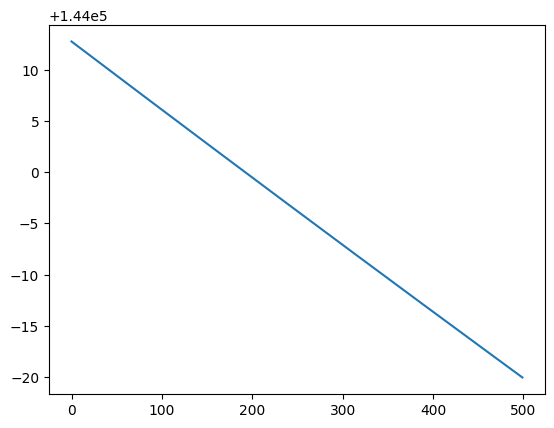

In [1887]:
plt.plot(iter, Cost)
plt.show()

In [1888]:
print(Cost.min())

143979.94921625472


In [1889]:
print(cost)

143979.94921625472


# Testing

In [1890]:

X_test = test.to_numpy()
X_test2 = test2.to_numpy()
#cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m_test, n_test = test.shape
_, n_test2 = test2.shape

In [1891]:
Y_test_pred = X_test2 @ w2 + X_test @ w + b
cost_test = (1/(2*m_test))*np.sum(pow(Y_test_pred-Y_test, 2)) 
print(cost_test)

140645.69450279546


In [1892]:
def errors(Y_pred, Y):
	error = Y_pred - Y_test
	MSE = np.mean(pow(error, 2))
	MAE = np.mean(abs(error))
	MAEP = np.mean(abs(error)/Y)

	print("Mean Absolute Error: ",MAE) 
	print("Mean Squared Error: ",MSE)
	print("Mean Absolute Error percentage: ",MAEP)

In [1893]:
errors(Y_test_pred, Y_test)

Mean Absolute Error:  417.004863022044
Mean Squared Error:  281291.389005591
Mean Absolute Error percentage:  0.9978348779079744
